In [34]:
#!/usr/bin/env python3

from env.MjEnv import MjEnv
import numpy as np
from matplotlib import pyplot as plt

# create and prepare the mujoco instance
mj = MjEnv(noload=True)
mj.testing_xmls = 0
mj.task_reload_chance = -1

# turn on automatic finding of highest stable timestep
mj.mj.set.auto_set_timestep = True

# set finger stiffness algorithm
# mj.mj.set.finger_stiffness = -100 # hardcoded real data convergence
# mj.mj.set.finger_stiffness = -0.5 # original model based on linear bending
mj.mj.set.finger_stiffness = -6.5 # new attempt at theory, equating angles 
# mj.mj.set.finger_stiffness = -101 # hardcoded theory predictions convergence
mj.mj.set.finger_stiffness = -7.5 # new attempt at theory, 2nd derivation attempt

# define the names of the object sets we want to investigate
object_set_folder = "free_first_joint"
object_sets = [
  "set_test_seg5",
  # "set_test_seg6",
  # "set_test_seg7",
  # "set_test_seg8",
  # "set_test_seg9",
  "set_test_seg10",
  # "set_test_seg15",
  "set_test_seg20",
  # "set_test_seg25",
  # "set_test_seg30"
]

set_name = "set4_fullset_795"
segments = [5, 10, 15, 20]

segments = list(range(5, 31))

# uncomment for FULL evaluation
object_sets = [
  "set_test_seg5",
  "set_test_seg6",
  "set_test_seg7",
  "set_test_seg8",
  "set_test_seg9",
  "set_test_seg10",
  "set_test_seg12",
  "set_test_seg14",
  "set_test_seg15",
  "set_test_seg16",
  "set_test_seg18",
  "set_test_seg20",
  "set_test_seg22",
  "set_test_seg24",
  "set_test_seg25",
  "set_test_seg26",
  "set_test_seg28",
  "set_test_seg30"
]

# initialise/wipe variables
data = []
num_sets = len(segments)

In [35]:
# OLD, this FEA data uses newtons not grams

# from FEA_data import FEA_1N, FEA_2N, FEA_3N, FEA_4N, FEA_5N

# # this data uses FORCES, it is [1N, 2N, 3N, 4N, 5N]
# FEA_xy = [
#   1e-3 * np.array(FEA_1N),
#   1e-3 * np.array(FEA_2N),
#   1e-3 * np.array(FEA_3N),
#   1e-3 * np.array(FEA_4N),
#   1e-3 * np.array(FEA_5N)]

In [36]:
from FEA_data import fea_data

# this data uses MASSES, it is [100g, 200g, 300g, 400g]
FEA_xy2 = [ 
  1e-3 * fea_data[1],
  1e-3 * fea_data[2],
  1e-3 * fea_data[3],
  1e-3 * fea_data[4]
]

In [37]:
from real_data import real_data

# this data uses MASSES, it is [100g, 200g, 300g, 400g]
REAL_xy = [
  1e-3 * real_data[2],
  1e-3 * real_data[4],
  1e-3 * real_data[6],
  1e-3 * real_data[8]
]

In [38]:
# # loop through each object set and gather data
# done_one = False
# for i in range(0, num_sets):

#   # if done_one: break

#   set_name = object_set_folder + "/" + object_sets[i]
#   # mj._load_object_set(name=set_name)
#   # mj._load_xml()
#   mj.load(object_set_name=set_name, num_segments=N)
#   # mj.mj.set.mujoco_timestep = mujoco_timesteps[i] * 0.5
#   mj.reset(hard=True)

#   # run the validation regime
#   print("Curve validation running for:", object_sets[i], "\tN is", mj.mj.get_N(), flush=True)
#   print_out = False
#   finger_data = mj.mj.curve_validation_regime(print_out)
#   data.append(finger_data)

#   done_one = True

# loop through each object set and gather data
for N in segments:

  mj.load(object_set_name=set_name, num_segments=N)
  mj.reset(hard=True)

  # run the validation regime
  print("Curve validation running for N =", N, "\t N in sim is", mj.mj.get_N(), flush=True)
  print_out = False
  finger_data = mj.mj.curve_validation_regime(print_out)
  data.append(finger_data)


Curve validation running for N = 5 	 N in sim is 5
Curve validation running for N = 6 	 N in sim is 6
Curve validation running for N = 7 	 N in sim is 7
Curve validation running for N = 8 	 N in sim is 8
Curve validation running for N = 9 	 N in sim is 9
Curve validation running for N = 10 	 N in sim is 10
Curve validation running for N = 11 	 N in sim is 11
Curve validation running for N = 12 	 N in sim is 12
Curve validation running for N = 13 	 N in sim is 13
Curve validation running for N = 14 	 N in sim is 14
Curve validation running for N = 15 	 N in sim is 15
Curve validation running for N = 16 	 N in sim is 16
Curve validation running for N = 17 	 N in sim is 17
Curve validation running for N = 18 	 N in sim is 18
Curve validation running for N = 19 	 N in sim is 19
Curve validation running for N = 20 	 N in sim is 20
Curve validation running for N = 21 	 N in sim is 21
Curve validation running for N = 22 	 N in sim is 22
Curve validation running for N = 23 	 N in sim is 23
Cur

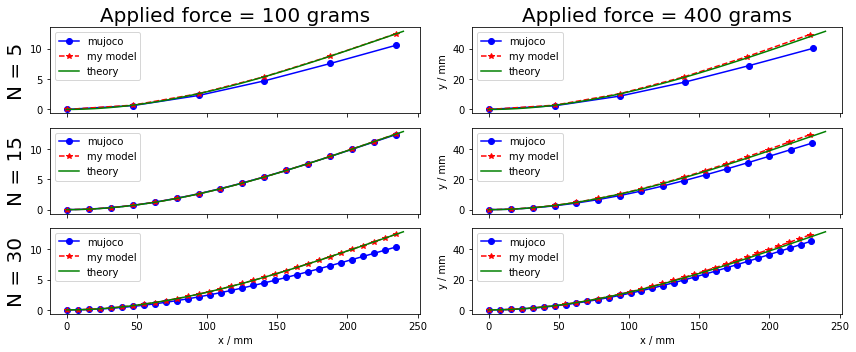

In [96]:
# now process the data and plot it

entries = list(range(num_sets))
# entries = [0, 5, -1]

if num_sets > 10:
  entries = [0, 10, -1]

max_force = 4

forces = list(range(1, max_force + 1))
forces = [1, max_force]

fig, axs = plt.subplots(len(entries), len(forces), sharex=True, sharey=False)

for i, force in enumerate(forces):
  for j, ind in enumerate(entries):

    # lets start by plotting a basic example
    x =        1e3 * np.array(data[ind].entries[force - 1].f1.x)
    y =        1e3 * np.array(data[ind].entries[force - 1].f1.y)
    pred_x =   1e3 * np.array(data[ind].entries[force - 1].f1.pred_x)
    pred_y =   1e3 * np.array(data[ind].entries[force - 1].f1.pred_y)
    theory_x = 1e3 * np.array(data[ind].entries[force - 1].f1.theory_x_curve)
    theory_y = 1e3 * np.array(data[ind].entries[force - 1].f1.theory_y_curve)

    axs[j][i].plot(x,        y,        "b-o",  label="mujoco")
    axs[j][i].plot(pred_x,   pred_y,   "r--*", label="my model")
    axs[j][i].plot(theory_x, theory_y, "g",    label="theory")
    # axs[j][i].plot(FEA_xy[force - 1][:,0], FEA_xy[force - 1][:,1], label="FEA") # this is NEWTONS
    # axs[j][i].plot(REAL_xy[force - 1][:,0], REAL_xy[force - 1][:,1], label="Real") # this is GRAMS
    # axs[j][i].plot(FEA_xy2[force - 1][:,0], FEA_xy2[force - 1][:,1], label="FEA") # this is GRAMS
    
    temp_N = len(data[ind].entries[force - 1].f1.y) - 1
    # axs[j][i].text(0.005, data[ind].entries[force - 1].f1.theory_y[-1] * 0.4,
    #   f"mujoco stddev wrt model= {1000 * data[ind].entries[force - 1].f1.error.std_y_wrt_pred_y:.2f}mm\n" +
    #   f"mujoco stddev wrt theory = {1000 * data[ind].entries[force - 1].f1.error.std_y_wrt_theory_y:.2f}mm\n" +
    #   f"model stddev wrt theory = {1000 * data[ind].entries[force - 1].f1.error.std_y_pred_wrt_theory_y:.2f}mm",
    #   fontsize=14)
    # axs[j][i].axis("equal")
    axs[j][i].legend(loc="upper left")
    # axs[j][i].set(ylim=(0, 60e-3))
    
    # add axis labels
    axs[j][i].set(ylabel="y / mm")
    if j == len(entries) - 1:
      axs[j][i].set(xlabel="x / mm")

    if j == 0:
      axs[j][i].set_title(f"Applied force = {force * 100} grams", fontsize=20)
    if i == 0:
      axs[j][i].set_ylabel(f"N = {temp_N}", fontsize=20, rotation=90)

# fig.set_size_inches(35, 25)
# fig.set_size_inches(20, 15)
fig.set_size_inches(12, 5)
fig.tight_layout()

In [40]:
print("theory x is", theory_x * 1000)
print("theory y is", theory_y * 1000)

theory x is [     0.           4895.83332092   9791.66664183  14687.49996275
  19583.33328366  24479.16567326  29374.99992549  34270.83045244
  39166.66656733  44062.49895692  48958.33134651  53854.1674614
  58749.99985099  63645.83224058  68541.66090488  73437.49701977
  78333.33313465  83229.16179895  88124.99791384  93020.83402872
  97916.66269302 102812.49880791 107708.33492279 112604.16358709
 117499.99970198 122395.82836628 127291.66448116 132187.50059605
 137083.32180977 141979.17282581 146874.99403954 151770.83015442
 156666.6662693  161562.50238419 166458.32359791 171354.17461395
 176249.99582767 181145.83194256 186041.66805744 190937.50417233
 195833.32538605 200729.17640209 205624.99761581 210520.8337307
 215416.66984558 220312.50596046 225208.32717419 230104.17819023
 234999.99940395 239895.83551884]
theory y is [0.00000000e+00 3.22596316e+01 1.28136147e+02 2.86275987e+02
 5.05325675e+02 7.83931464e+02 1.12074008e+03 1.51439768e+03
 1.96355116e+03 2.46684626e+03 3.02293012e

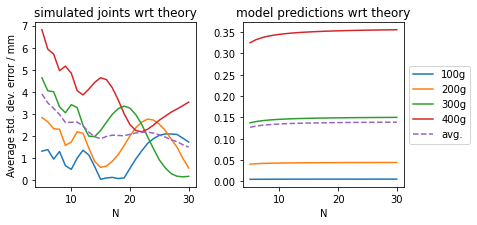

In [76]:
fig2, axs2 = plt.subplots(1, 2, sharey=False)

# redefine forces and entries to include all, otherwise index error
entries = list(range(num_sets))
forces = list(range(1, max_force + 1))

# get std deviation data
dev_y_wrt_pred_y = np.zeros((num_sets, len(forces)))
dev_y_wrt_theory_y = np.zeros((num_sets, len(forces)))
dev_y_pred_wrt_theory_y = np.zeros((num_sets, len(forces)))

labels = ["100g", "200g", "300g", "400g", "avg."]
sets_N = []

for i in range(num_sets):

  sets_N.append(len(data[i].entries[0].f1.y) - 1)

  for j in range(max_force):

    dev_y_wrt_pred_y[i, j] = data[i].entries[forces[j] - 1].f1.error.std_y_wrt_pred_y * 1000
    dev_y_wrt_theory_y[i, j] = data[i].entries[forces[j] - 1].f1.error.std_y_wrt_theory_y * 1000
    dev_y_pred_wrt_theory_y[i, j] = data[i].entries[forces[j] - 1].f1.error.std_y_pred_wrt_theory_y * 1000

# get the mean error
mean_y_wrt_pred_y = np.mean(dev_y_wrt_pred_y, axis=1)
mean_y_wrt_theory_y = np.mean(dev_y_wrt_theory_y, axis=1)
mean_y_pred_wrt_theory_y = np.mean(dev_y_pred_wrt_theory_y, axis=1)

p = -1
avg = '--'

# # first plot
# p += 1
# axs2[p].plot(np.array(sets_N), dev_y_wrt_pred_y)
# axs2[p].plot(np.array(sets_N), mean_y_wrt_pred_y, avg)
# axs2[p].set_title("sim wrt model")
# axs2[p].set(xlabel="N")

# second plot
p += 1
axs2[p].plot(np.array(sets_N), dev_y_wrt_theory_y)
axs2[p].plot(np.array(sets_N), mean_y_wrt_theory_y, avg)
axs2[p].set_title("simulated joints wrt theory")
axs2[p].set(xlabel="N")

# third plot
p += 1
axs2[p].plot(np.array(sets_N), dev_y_pred_wrt_theory_y)
axs2[p].plot(np.array(sets_N), mean_y_pred_wrt_theory_y, avg)
axs2[p].set_title("model predictions wrt theory")
axs2[p].set(xlabel="N")

# add legend and labels
lines = axs2[p].get_lines()
plt.legend(iter(lines), labels, loc="center left", bbox_to_anchor=(1, 0.5))
axs2[0].set(ylabel="Average std. dev. error / mm", xlabel="N")
# fig2.suptitle("Joint displacement error against number of segments, N", fontsize=14)
fig2.tight_layout()
# fig2.subplots_adjust(top=0.8)
fig2.set_size_inches(7, 3)

# print(mean_y_wrt_pred_y)
# print(mean_y_pred_wrt_theory_y)


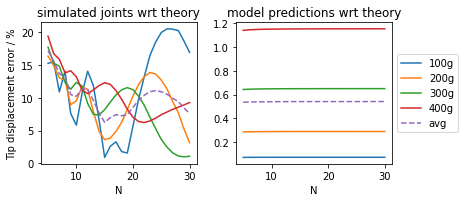

In [77]:
fig3, axs3 = plt.subplots(1, 2, sharey=False)

# redefine forces and entries to include all, otherwise index error
entries = list(range(num_sets))
forces = list(range(1, max_force + 1))

# get tip error data
tip_y_wrt_pred_y = np.zeros((num_sets, len(forces)))
tip_y_wrt_theory_y = np.zeros((num_sets, len(forces)))
tip_y_pred_wrt_theory_y = np.zeros((num_sets, len(forces)))

labels = ["100g", "200g", "300g", "400g", "avg"]
sets_N = []

for i in range(num_sets):

  sets_N.append(len(data[i].entries[forces[j] - 1].f1.y) - 1)

  for j in range(len(forces)):

    # # abs value4
    # tip_y_wrt_pred_y[i, j] = data[i].entries[forces[j] - 1].f1.error.y_tip_wrt_pred_y * 1000
    # tip_y_wrt_theory_y[i, j] = data[i].entries[forces[j] - 1].f1.error.y_tip_wrt_theory_y * 1000
    # tip_y_pred_wrt_theory_y[i, j] = data[i].entries[forces[j] - 1].f1.error.y_pred_tip_wrt_theory_y * 1000

    # percentage
    tip_y_wrt_pred_y[i, j] = data[i].entries[forces[j] - 1].f1.error.y_tip_wrt_pred_y_percent * 100
    tip_y_wrt_theory_y[i, j] = data[i].entries[forces[j] - 1].f1.error.y_tip_wrt_theory_y_percent * 100
    tip_y_pred_wrt_theory_y[i, j] = data[i].entries[forces[j] - 1].f1.error.y_pred_tip_wrt_theory_y_percent * 100

# get the mean error
mean_y_wrt_pred_y = np.mean(tip_y_wrt_pred_y, axis=1)
mean_y_wrt_theory_y = np.mean(tip_y_wrt_theory_y, axis=1)
mean_y_pred_wrt_theory_y = np.mean(tip_y_pred_wrt_theory_y, axis=1)

p = -1
avg = '--'

# # first plot
# p += 1
# axs3[p].plot(np.array(sets_N), tip_y_wrt_pred_y)
# axs3[p].plot(np.array(sets_N), mean_y_wrt_pred_y, avg)
# axs3[p].set_title("sim wrt model")
# axs3[p].set(xlabel="N")

# second plot
p += 1
axs3[p].plot(np.array(sets_N), tip_y_wrt_theory_y)
axs3[p].plot(np.array(sets_N), mean_y_wrt_theory_y, avg)
axs3[p].set_title("simulated joints wrt theory")
axs3[p].set(xlabel="N")

# third plot
p += 1
axs3[p].plot(np.array(sets_N), tip_y_pred_wrt_theory_y)
axs3[p].plot(np.array(sets_N), mean_y_pred_wrt_theory_y, avg)
axs3[p].set_title("model predictions wrt theory")
axs3[p].set(xlabel="N")

# add legend and labels
lines = axs3[p].get_lines()
plt.legend(iter(lines), labels, loc="center left", bbox_to_anchor=(1, 0.5))
axs3[0].set(ylabel="Tip displacement error / %", xlabel="N")
# fig3.suptitle("Tip displacement error against number of segments, N", fontsize=14)
fig3.tight_layout()
fig3.subplots_adjust(top=0.8)
fig3.set_size_inches(7, 3)

In [43]:
# print(mean_error)
# print(mean_error_2)